In [ ]:
# ------------------------------ Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
# from google.colab import drive # import csv data from gdrive
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

### Dataset Columns Explanation

In [10]:
desc = pd.read_csv('columns_description.csv')
desc

,Table,Columns,Description
0,loanapptrain.csv / loanapptest.csv,LN_ID,Loan ID
1,loanapptrain.csv / loanapptest.csv,TARGET,Target variable (1 - client with late payment ...
2,loanapptrain.csv / loanapptest.csv,CONTRACT_TYPE,Identification if loan is cash or revolving
3,loanapptrain.csv / loanapptest.csv,GENDER,Gender of the client
4,loanapptrain.csv / loanapptest.csv,NUM_CHILDREN,Number of children the client has
5,loanapptrain.csv / loanapptest.csv,INCOME,Monthly income of the client
6,loanapptrain.csv / loanapptest.csv,APPROVED_CREDIT,Approved credit amount of the loan
7,loanapptrain.csv / loanapptest.csv,ANNUITY,Loan annuity (amount that must be paid monthly)
8,loanapptrain.csv / loanapptest.csv,PRICE,For consumer loans it is the price of the good...
9,loanapptrain.csv / loanapptest.csv,INCOME_TYPE,"Clients income type (businessman, working, mat..."


<center><h1 font-size='40px'>Preprocessing and Features Engineering</h1></center>

In [2]:
test = pd.read_csv('app_test.csv')

In [3]:
test.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,102590,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,-17598,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260
1,35895,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,...,-14097,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN
2,69154,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,...,-18384,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393
3,222185,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,...,-12170,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826
4,147680,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,...,-10790,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774


In [4]:
train = pd.read_csv('app_train.csv')

In [5]:
train.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3
0,201468,333538,0,Revolving loans,F,1,67500.0,202500.0,10125.0,202500.0,...,-11539,-921,-119.0,-2757,TUESDAY,18,Business Entity Type 3,0.572805,0.608276,NaN
1,264803,406644,0,Cash loans,F,1,202500.0,976711.5,49869.0,873000.0,...,-15743,-4482,-1797.0,-2455,TUESDAY,14,Other,0.655600,0.684298,NaN
2,137208,259130,0,Cash loans,F,0,180000.0,407520.0,25060.5,360000.0,...,-20775,365243,-8737.0,-4312,THURSDAY,14,NA1,NaN,0.580687,0.749022
3,269220,411997,0,Cash loans,M,0,225000.0,808650.0,26086.5,675000.0,...,-20659,-10455,-4998.0,-4010,WEDNESDAY,10,Culture,NaN,0.623740,0.710674
4,122096,241559,0,Revolving loans,M,0,135000.0,180000.0,9000.0,180000.0,...,-9013,-1190,-3524.0,-1644,SUNDAY,11,Construction,0.175511,0.492994,0.085595


In [6]:
train['TARGET'].value_counts()

0    56534
1     4969
Name: TARGET, dtype: int64

In [11]:
prev = pd.read_csv('prev_app.csv')
prev

,Unnamed: 0,SK_ID_PREV,LN_ID,CONTRACT_TYPE,ANNUITY,APPLICATION,APPROVED_CREDIT,AMT_DOWN_PAYMENT,PRICE,WEEKDAYS_APPLY,HOUR_APPLY,CONTRACT_STATUS,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Approved,-73,12.0,middle,365243.0,-42.0,-37.0,0.0
1,3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Approved,-512,12.0,middle,365243.0,-482.0,-177.0,1.0
2,5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Approved,-684,18.0,low_normal,365243.0,-654.0,-137.0,1.0
3,6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Canceled,-14,NaN,NA1,NaN,NaN,NaN,NaN
4,10,1715995,447712,Cash loans,11368.620,270000.0,335754.0,NaN,270000.0,FRIDAY,7,Approved,-735,54.0,low_normal,365243.0,-705.0,-334.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350707,1670100,1379569,309506,Cash loans,33389.100,1035000.0,1035000.0,NaN,1035000.0,THURSDAY,10,Refused,-156,60.0,low_normal,NaN,NaN,NaN,NaN
350708,1670115,1252861,363895,Cash loans,56754.000,1350000.0,1350000.0,NaN,1350000.0,THURSDAY,16,Refused,-847,48.0,middle,NaN,NaN,NaN,NaN
350709,1670139,1379406,302265,Cash loans,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,13,Canceled,-502,NaN,NA1,NaN,NaN,NaN,NaN
350710,1670160,2698899,161204,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,13,Canceled,-359,NaN,NA1,NaN,NaN,NaN,NaN


In [14]:
install = pd.read_csv('installment_payment.csv')
install

,Unnamed: 0,SK_ID_PREV,LN_ID,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,5,1137312,164489,12,-1384.0,-1417.0,5970.375,5970.375
1,8,2723183,112102,14,-197.0,-197.0,70.740,70.740
2,11,2558880,154793,8,-1262.0,-1269.0,15031.080,15031.080
3,17,1410565,197687,1,-1037.0,-1048.0,12514.050,12510.450
4,18,2391610,183431,20,-1680.0,-1693.0,7875.000,7875.000
...,...,...,...,...,...,...,...,...
2872301,13605282,1024845,407119,5,-224.0,-230.0,24819.660,24819.660
2872302,13605286,2597827,448211,18,-44.0,-44.0,915.795,915.795
2872303,13605319,2003162,450999,16,-2135.0,-2113.0,5414.265,5384.880
2872304,13605341,2149043,415032,9,-425.0,-434.0,46517.490,46517.490


In [15]:
#check Data Dimension
print ("train data      :",train.shape)
print("test data        :",test.shape)
print("previous data    :",prev.shape)
print("installment data :",install.shape)



train data      : (61503, 24)
test data        : (14761, 24)
previous data    : (350712, 19)
installment data : (2872306, 8)


In [16]:
#train and test data have same column, I merge data to easiest cleaning data
train['key'] = 'train'
test['key'] = 'test'
df = pd.concat([test,train])
df.head()

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,WEEKDAYS_APPLY,HOUR_APPLY,ORGANIZATION_TYPE,EXT_SCORE_1,EXT_SCORE_2,EXT_SCORE_3,key
0,102590,219092,0,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,-2650,-1411.0,-1131,SATURDAY,7,Business Entity Type 3,NaN,0.145475,0.651260,test
1,35895,141577,0,Cash loans,F,0,144000.0,485640.0,34537.5,450000.0,...,-7408,-7908.0,-4872,MONDAY,14,Kindergarten,NaN,0.682675,NaN,test
2,69154,180205,0,Cash loans,F,1,90000.0,247500.0,8887.5,247500.0,...,-2826,-8226.0,-1930,SATURDAY,12,Self-employed,0.814700,0.686312,0.758393,test
3,222185,357381,0,Cash loans,M,2,112500.0,506889.0,24781.5,418500.0,...,-926,-916.0,-4048,THURSDAY,13,Other,0.399219,0.266520,0.058826,test
4,147680,271229,0,Cash loans,M,0,216000.0,450000.0,21888.0,450000.0,...,-577,-4640.0,-2035,MONDAY,14,Business Entity Type 3,0.368452,0.610483,0.392774,test


In [17]:
df.shape

(76264, 25)

In [8]:
## checking unique value
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In [9]:
##Checking missing data
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [20]:
missing_data(install)

,Total,Percent
AMT_PAY,673,0.023431
PAY_DAYS,673,0.023431
AMT_INST,0,0.000000
INST_DAYS,0,0.000000
INST_NUMBER,0,0.000000
LN_ID,0,0.000000
SK_ID_PREV,0,0.000000
Unnamed: 0,0,0.000000


In [23]:
missing_data(df)

,Total,Percent
EXT_SCORE_1,43157,56.588954
EXT_SCORE_3,15158,19.875695
EXT_SCORE_2,153,0.200619
PRICE,82,0.107521
ANNUITY,1,0.001311
key,0,0.000000
INCOME_TYPE,0,0.000000
LN_ID,0,0.000000
TARGET,0,0.000000
CONTRACT_TYPE,0,0.000000


In [24]:
#almost clean. drop columns with missing values more than 50 %

df = df.drop(['EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3'], axis=1)

#Clean other EXT_Score

In [25]:
#Because the amount of PRICE and ANNUITY data that is NaN values does not reach 1%. Then we just drop the NAN value"
df.dropna(subset=['PRICE','ANNUITY'],axis=0, inplace=True)

<AxesSubplot:>

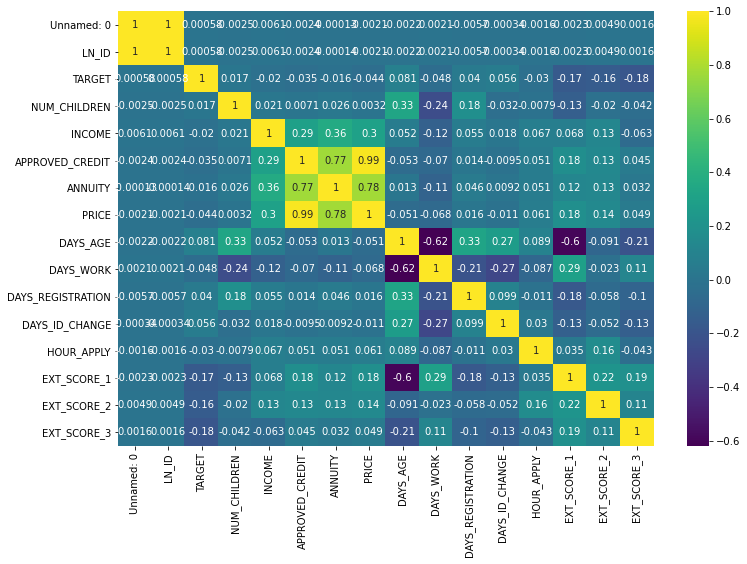

In [22]:
#Check Corelation Feature
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [21]:
missing_data(prev)

,Total,Percent
AMT_DOWN_PAYMENT,186507,53.179532
NFLAG_INSURED_ON_APPROVAL,139305,39.720625
FIRST_DUE,139305,39.720625
FIRST_DRAW,139305,39.720625
TERMINATION,139305,39.720625
PRICE,79640,22.708091
TERM_PAYMENT,76609,21.843849
ANNUITY,76609,21.843849
APPLICATION,0,0.000000
SK_ID_PREV,0,0.000000


In [26]:
#Drop columns with missing values more than 50 %

prev = prev.drop(['AMT_DOWN_PAYMENT'], axis=1)

In [27]:
prev['NFLAG_INSURED_ON_APPROVAL'].describe()

count    211407.000000
mean          0.331980
std           0.470925
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [28]:
prev.NFLAG_INSURED_ON_APPROVAL.unique()

array([ 0.,  1., nan])

In [29]:
prev['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    141224
1.0     70183
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [30]:
prev['NFLAG_INSURED_ON_APPROVAL'].mode()

0    0.0
dtype: float64

In [31]:
#fill na with mode
prev['NFLAG_INSURED_ON_APPROVAL'] = prev['NFLAG_INSURED_ON_APPROVAL'].fillna(prev['NFLAG_INSURED_ON_APPROVAL'].mode()[0])

In [32]:
prev['FIRST_DUE'].describe()

count    211407.000000
mean      13228.355887
std       71030.663471
min       -2892.000000
25%       -1625.000000
50%        -825.000000
75%        -408.000000
max      365243.000000
Name: FIRST_DUE, dtype: float64

In [33]:
#fill na with median
prev['FIRST_DUE'] = prev['FIRST_DUE'].fillna(prev['FIRST_DUE'].median())

In [34]:
prev['FIRST_DRAW'].describe()

count    211407.000000
mean     342238.632122
std       88866.480608
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: FIRST_DRAW, dtype: float64

In [35]:
prev['FIRST_DRAW'] = prev['FIRST_DRAW'].fillna(prev['FIRST_DRAW'].median())

In [36]:
prev['TERMINATION'].describe()

count    211407.000000
mean      82378.742109
std      153553.036032
min       -2845.000000
25%       -1267.000000
50%        -495.000000
75%         -43.000000
max      365243.000000
Name: TERMINATION, dtype: float64

In [37]:
prev['TERMINATION'] = prev['TERMINATION'].fillna(prev['TERMINATION'].median())

In [38]:
prev['PRICE'].describe()

count    2.710720e+05
mean     2.260759e+05
std      3.147324e+05
min      0.000000e+00
25%      4.966091e+04
50%      1.101150e+05
75%      2.295000e+05
max      4.050000e+06
Name: PRICE, dtype: float64

In [39]:
prev['PRICE'] = prev['PRICE'].fillna(prev['PRICE'].mean())

In [40]:
prev['TERM_PAYMENT'].describe()

count    274103.000000
mean         16.074268
std          14.595200
min           0.000000
25%           6.000000
50%          12.000000
75%          24.000000
max          84.000000
Name: TERM_PAYMENT, dtype: float64

In [41]:
prev['TERM_PAYMENT']=prev['TERM_PAYMENT'].fillna(prev['TERM_PAYMENT'].median())

In [42]:
prev['ANNUITY'].describe()

count    274103.000000
mean      15793.209924
std       14601.033712
min           0.000000
25%        6258.915000
50%       11201.085000
75%       20356.065000
max      418058.145000
Name: ANNUITY, dtype: float64

In [43]:
prev['ANNUITY']=prev['ANNUITY'].fillna(prev['ANNUITY'].median())

In [44]:
#merge data installment with previous applications
merge_df = pd.merge(prev, install, on='SK_ID_PREV', how='left', suffixes=('', '_remove'))
merge_df.drop([i for i in merge_df.columns if 'remove' in i],
               axis=1, inplace=True)

In [45]:
#merge with data train and test
final_df = pd.merge(df, merge_df, on=('LN_ID'), how='inner', suffixes=('', '_remove'))
final_df.drop([i for i in final_df.columns if 'remove' in i],
               axis=1, inplace=True)

In [46]:
unique_values(final_df)

,Total,Uniques
Unnamed: 0,2766934,72056
LN_ID,2766934,72056
TARGET,2766934,2
CONTRACT_TYPE,2766934,2
GENDER,2766934,2
NUM_CHILDREN,2766934,10
INCOME,2766934,782
APPROVED_CREDIT,2766934,3712
ANNUITY,2766934,9741
PRICE,2766934,559


In [47]:
missing_data(final_df)

,Total,Percent
AMT_PAY,147562,5.333051
PAY_DAYS,147562,5.333051
INST_DAYS,146965,5.311475
INST_NUMBER,146965,5.311475
AMT_INST,146965,5.311475
ANNUITY,0,0.000000
HOUSING_TYPE,0,0.000000
FAMILY_STATUS,0,0.000000
EDUCATION,0,0.000000
INCOME_TYPE,0,0.000000


In [49]:
final_df['AMT_PAY'].describe()

count    2.619372e+06
mean     1.826661e+04
std      5.650700e+04
min      0.000000e+00
25%      4.061970e+03
50%      8.853390e+03
75%      1.704034e+04
max      3.371884e+06
Name: AMT_PAY, dtype: float64

In [50]:
final_df['AMT_PAY'] = final_df['AMT_PAY'].fillna(final_df['AMT_PAY'].median())

In [51]:
final_df['PAY_DAYS'] = final_df['PAY_DAYS'].fillna(final_df['PAY_DAYS'].median())

In [52]:
final_df['INST_DAYS'].describe()

count    2.619969e+06
mean    -9.677426e+02
std      7.542222e+02
min     -2.906000e+03
25%     -1.514000e+03
50%     -7.480000e+02
75%     -3.350000e+02
max     -2.000000e+00
Name: INST_DAYS, dtype: float64

In [53]:
final_df['INST_DAYS'] = final_df['INST_DAYS'].fillna(final_df['INST_DAYS'].median())

In [54]:
final_df['INST_NUMBER'].describe()

count    2.619969e+06
mean     1.485727e+01
std      2.078532e+01
min      1.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      2.200000e+02
Name: INST_NUMBER, dtype: float64

In [55]:
final_df['INST_NUMBER'] = final_df['INST_NUMBER'].fillna(final_df['INST_NUMBER'].median())

In [56]:
final_df['AMT_INST'].describe()

count    2.619969e+06
mean     1.807870e+04
std      5.218324e+04
min      0.000000e+00
25%      4.649985e+03
50%      9.208620e+03
75%      1.774620e+04
max      3.371884e+06
Name: AMT_INST, dtype: float64

In [57]:
final_df['AMT_INST'] = final_df['AMT_INST'].fillna(final_df['AMT_INST'].median())

In [59]:
final_df['TARGET'].value_counts()

0    2550127
1     216807
Name: TARGET, dtype: int64

In [60]:
#change the target value to explor dataset
final_df["TARGET"].replace({0: "good", 1: "bad"}, inplace=True)

In [61]:
final_df

,Unnamed: 0,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,...,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL,INST_NUMBER,INST_DAYS,PAY_DAYS,AMT_INST,AMT_PAY
0,102590,219092,good,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,middle,365243.0,-1710.0,-1434.0,0.0,7.0,-1530.0,-1534.0,8829.270,8829.270
1,102590,219092,good,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,middle,365243.0,-1710.0,-1434.0,0.0,4.0,-1620.0,-1629.0,8829.270,8829.270
2,102590,219092,good,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,middle,365243.0,-1710.0,-1434.0,0.0,9.0,-1470.0,-1503.0,8829.270,8829.270
3,102590,219092,good,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,middle,365243.0,-1710.0,-1434.0,0.0,6.0,-1560.0,-1571.0,8829.270,8829.270
4,102590,219092,good,Cash loans,M,3,135000.0,871029.0,44604.0,765000.0,...,middle,365243.0,-1710.0,-1434.0,0.0,10.0,-1440.0,-1440.0,8848.395,8848.395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766929,166652,293198,good,Cash loans,F,0,90000.0,203760.0,20281.5,180000.0,...,high,365243.0,-368.0,-240.0,0.0,4.0,-278.0,-326.0,3948.525,3948.525
2766930,166652,293198,good,Cash loans,F,0,90000.0,203760.0,20281.5,180000.0,...,high,365243.0,-368.0,-240.0,0.0,1.0,-368.0,-386.0,3948.525,3948.525
2766931,166652,293198,good,Cash loans,F,0,90000.0,203760.0,20281.5,180000.0,...,high,365243.0,-368.0,-240.0,0.0,5.0,-248.0,-276.0,32493.645,32493.645
2766932,166652,293198,good,Cash loans,F,0,90000.0,203760.0,20281.5,180000.0,...,high,365243.0,-368.0,-240.0,0.0,3.0,-308.0,-326.0,3948.525,3948.525


In [62]:
final_df = final_df.drop(['Unnamed: 0'], axis=1)

In [63]:
# updating the numcol and catcol
numcol = final_df.select_dtypes('number').columns
catcol = final_df.select_dtypes('object').columns

In [64]:
#measure the correlation of numerical features
from scipy.stats import mannwhitneyu
mann = []
for i in numcol:
    if mannwhitneyu(final_df[final_df['TARGET'] == 'good'][i], 
                    final_df[final_df['TARGET'] == 'bad'][i])[1] < 0.05:
        mann.append('Reject Null Hypothesis')
    else:
        mann.append('Fail to Reject Null Hypothesis')

res = pd.DataFrame(data = [numcol, mann]).T
res.columns = ['Columns', 'Hypothesis']
res

,Columns,Hypothesis
0,LN_ID,Reject Null Hypothesis
1,NUM_CHILDREN,Reject Null Hypothesis
2,INCOME,Reject Null Hypothesis
3,APPROVED_CREDIT,Reject Null Hypothesis
4,ANNUITY,Reject Null Hypothesis
5,PRICE,Reject Null Hypothesis
6,DAYS_AGE,Reject Null Hypothesis
7,DAYS_WORK,Reject Null Hypothesis
8,DAYS_REGISTRATION,Reject Null Hypothesis
9,DAYS_ID_CHANGE,Reject Null Hypothesis


two column can be removed

<AxesSubplot:>

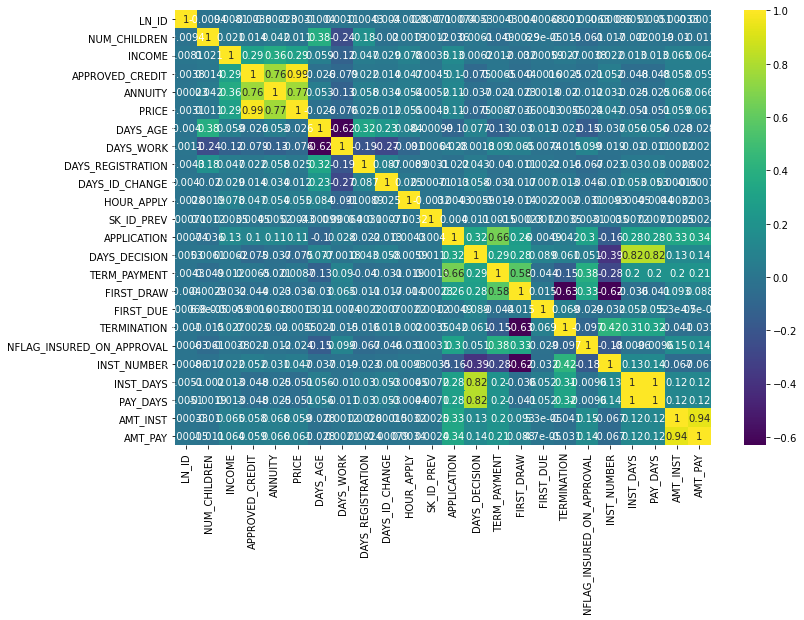

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(final_df.corr(), annot=True, cmap='viridis')

In [66]:
corrmat = final_df.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
524,PAY_DAYS,INST_DAYS,1.00
123,PRICE,APPROVED_CREDIT,0.99
574,AMT_PAY,AMT_INST,0.94
517,PAY_DAYS,DAYS_DECISION,0.82
493,INST_DAYS,DAYS_DECISION,0.82
124,PRICE,ANNUITY,0.77
99,ANNUITY,APPROVED_CREDIT,0.76
348,TERM_PAYMENT,APPLICATION,0.66
423,TERMINATION,FIRST_DRAW,0.63
471,INST_NUMBER,FIRST_DRAW,0.62


In [67]:
final_df['PAY_DAYS']

0         -1534.0
1         -1629.0
2         -1503.0
3         -1571.0
4         -1440.0
            ...  
2766929    -326.0
2766930    -386.0
2766931    -276.0
2766932    -326.0
2766933    -357.0
Name: PAY_DAYS, Length: 2766934, dtype: float64

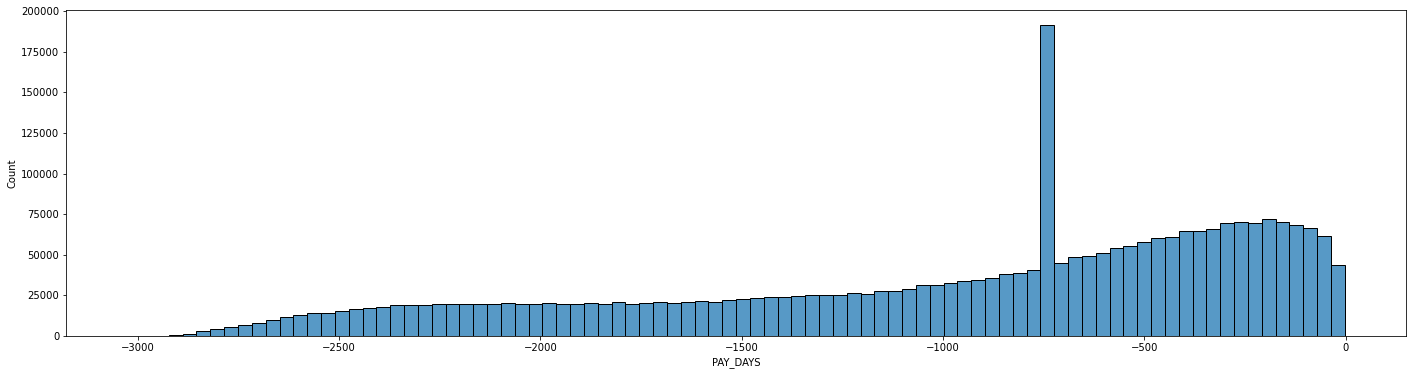

In [68]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='PAY_DAYS', bins=88, palette='viridis');

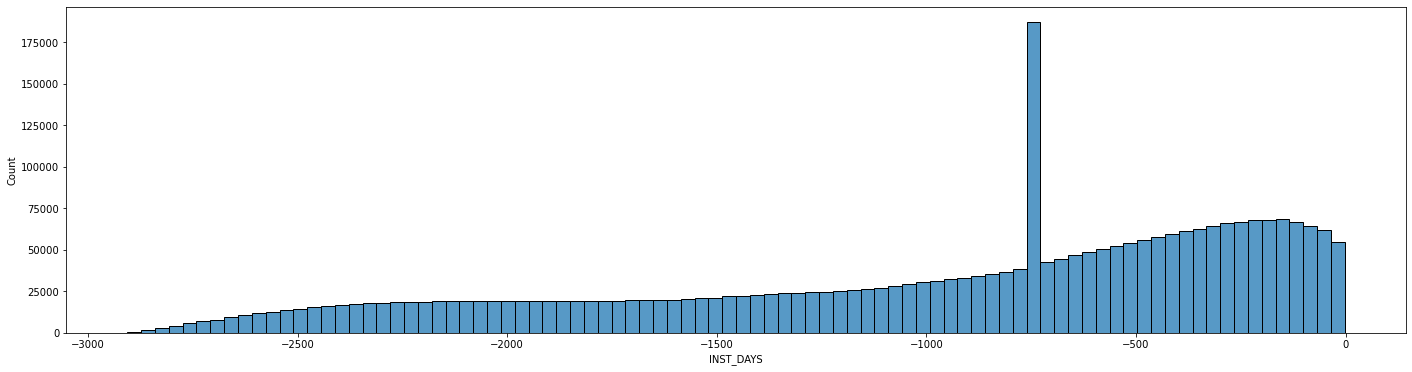

In [69]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='INST_DAYS', bins=88, palette='viridis');

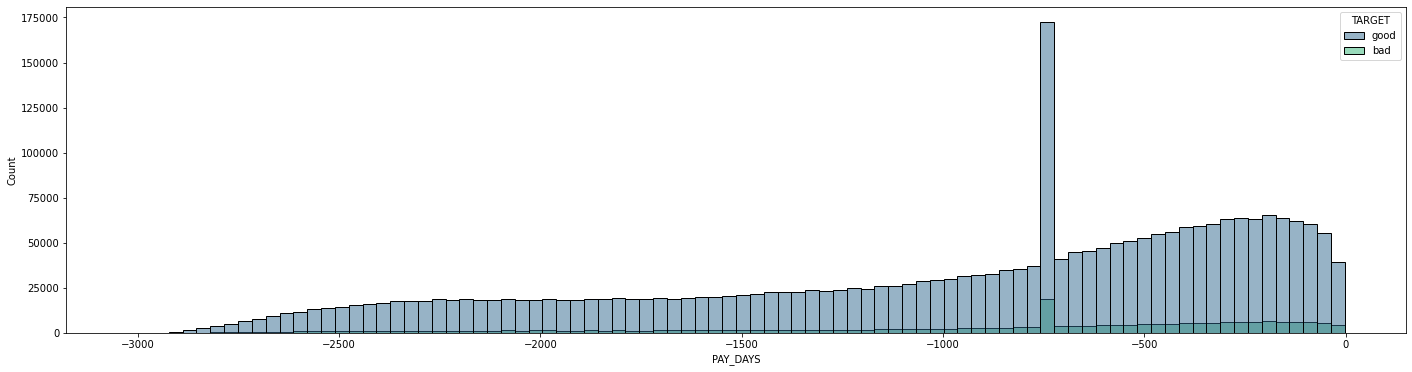

In [70]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='PAY_DAYS', bins=88, hue='TARGET', palette='viridis');

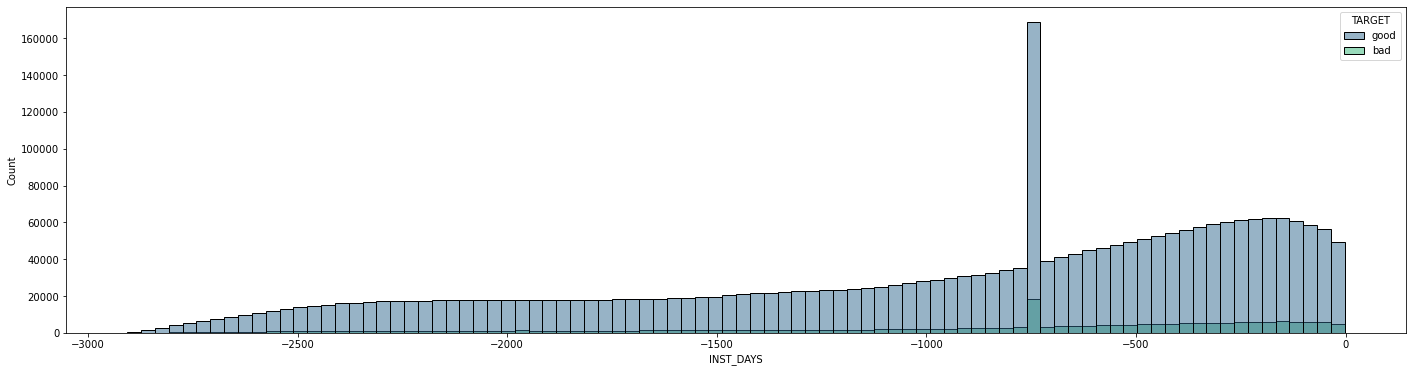

In [71]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='INST_DAYS', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='INST_DAYS', ylabel='TARGET'>

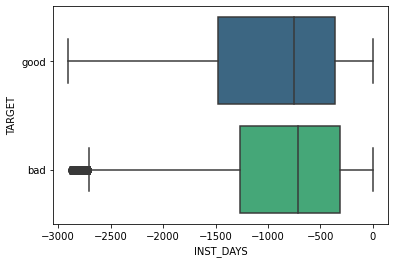

In [72]:
sns.boxplot(data=final_df, y='TARGET', x='INST_DAYS', palette='viridis')

<AxesSubplot:xlabel='PAY_DAYS', ylabel='TARGET'>

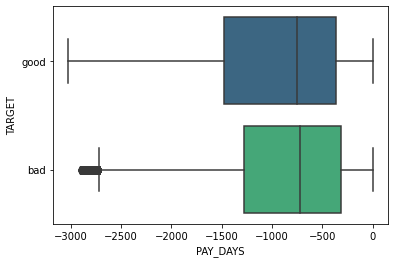

In [73]:
sns.boxplot(data=final_df, y='TARGET', x='PAY_DAYS', palette='viridis')

In [74]:
#drop Installment days
final_df = final_df.drop(['INST_DAYS'], axis=1)

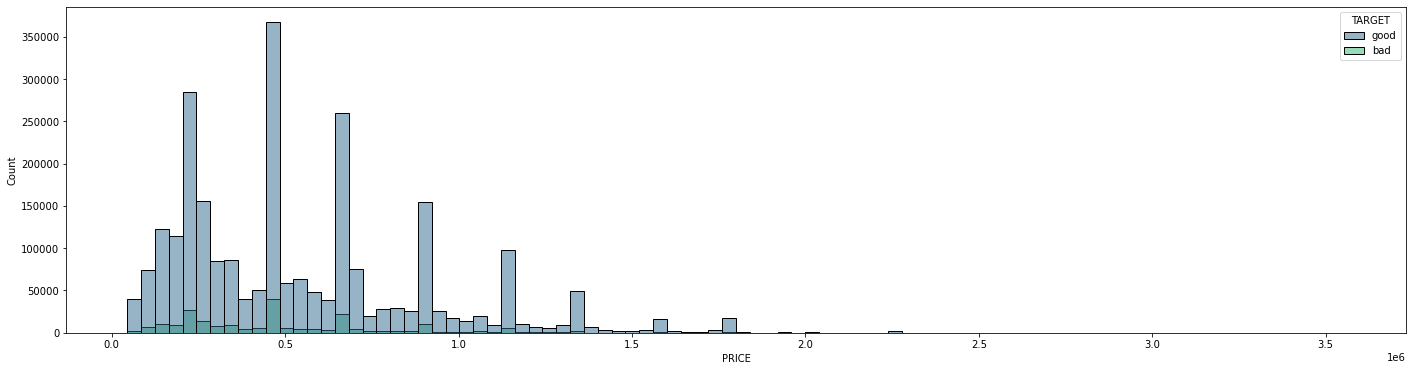

In [75]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='PRICE', bins=88, hue='TARGET', palette='viridis');

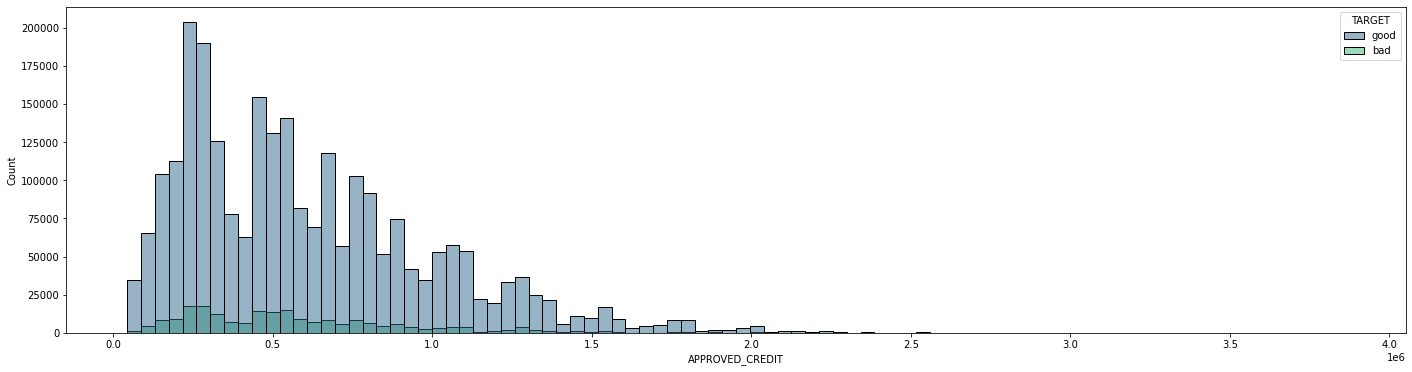

In [76]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='APPROVED_CREDIT', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='PRICE', ylabel='TARGET'>

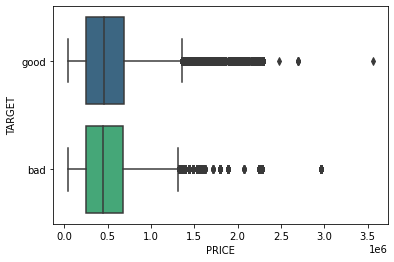

In [77]:
sns.boxplot(data=final_df, y='TARGET', x='PRICE', palette='viridis')

<AxesSubplot:xlabel='APPROVED_CREDIT', ylabel='TARGET'>

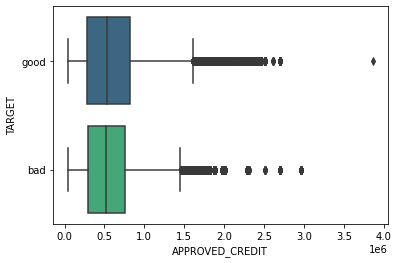

In [78]:
sns.boxplot(data=final_df, y='TARGET', x='APPROVED_CREDIT', palette='viridis')

In [79]:
#the best is price, lets choose an remove outlier
len(final_df[final_df['PRICE'] > 170000])*100/len(final_df)

90.62547209293753

In [80]:
final_df = final_df[final_df['PRICE'] < 1750000]

In [81]:
#drop Installment days
final_df = final_df.drop(['APPROVED_CREDIT'], axis=1)

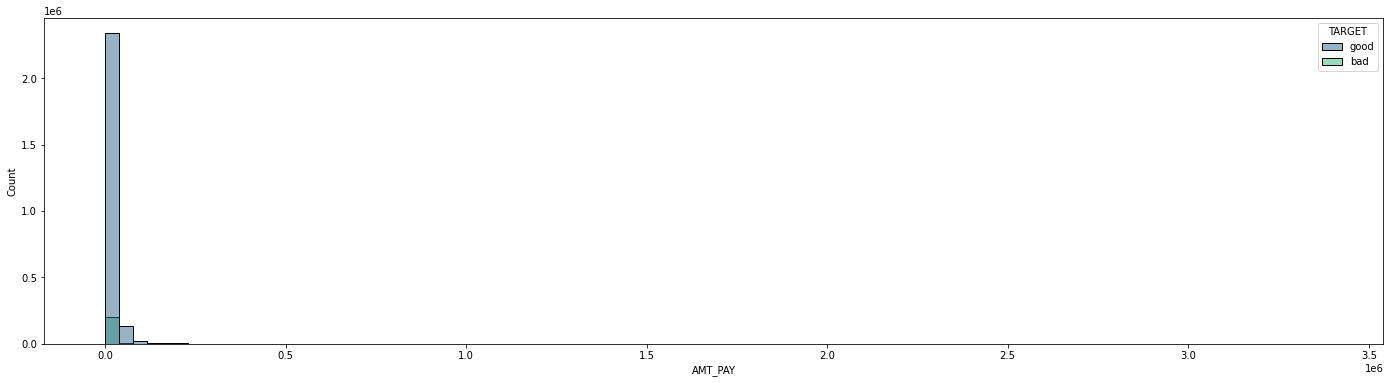

In [82]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='AMT_PAY', bins=88, hue='TARGET', palette='viridis');

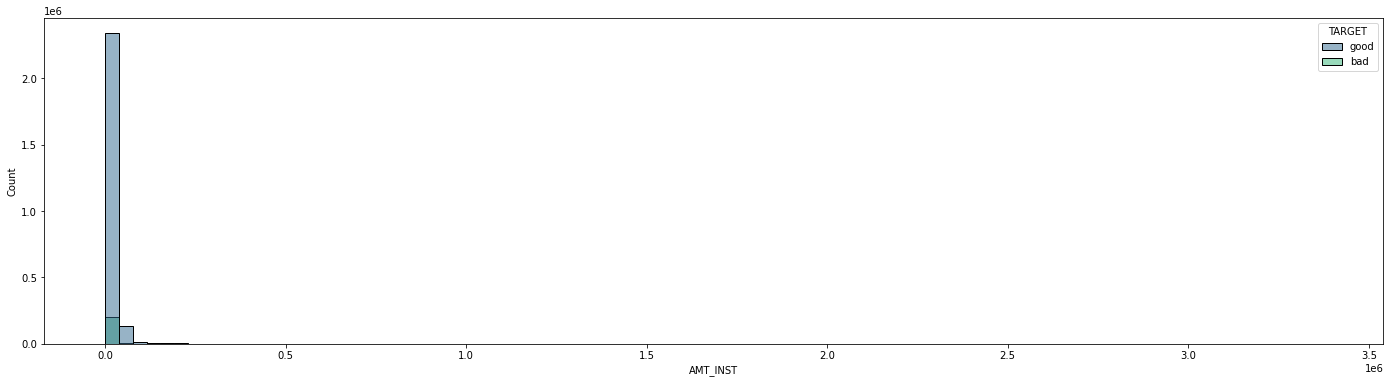

In [83]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='AMT_INST', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='AMT_PAY', ylabel='TARGET'>

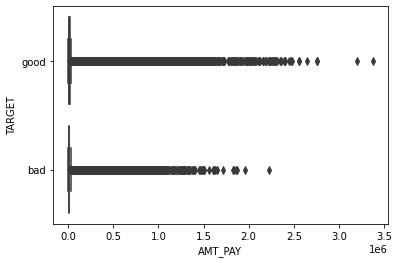

In [84]:
sns.boxplot(data=final_df, y='TARGET', x='AMT_PAY', palette='viridis')

<AxesSubplot:xlabel='AMT_INST', ylabel='TARGET'>

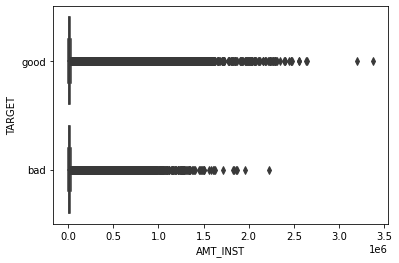

In [85]:
sns.boxplot(data=final_df, y='TARGET', x='AMT_INST', palette='viridis')

In [86]:
len(final_df[final_df['AMT_PAY'] > 200000])*100/len(final_df)

0.8996613773524532

In [87]:
final_df = final_df[final_df['AMT_PAY'] < 200000]

In [88]:
#drop Ammount Installment
final_df = final_df.drop(['AMT_INST'], axis=1)

In [89]:
corrmat = final_df.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Var1,Var2,Correlation
411,PAY_DAYS,DAYS_DECISION,0.82
87,PRICE,ANNUITY,0.75
284,TERM_PAYMENT,APPLICATION,0.65
350,TERMINATION,FIRST_DRAW,0.63
131,DAYS_WORK,DAYS_AGE,0.62
392,INST_NUMBER,FIRST_DRAW,0.62
307,FIRST_DRAW,TERM_PAYMENT,0.58
431,AMT_PAY,APPLICATION,0.51
394,INST_NUMBER,TERMINATION,0.42
390,INST_NUMBER,DAYS_DECISION,0.38


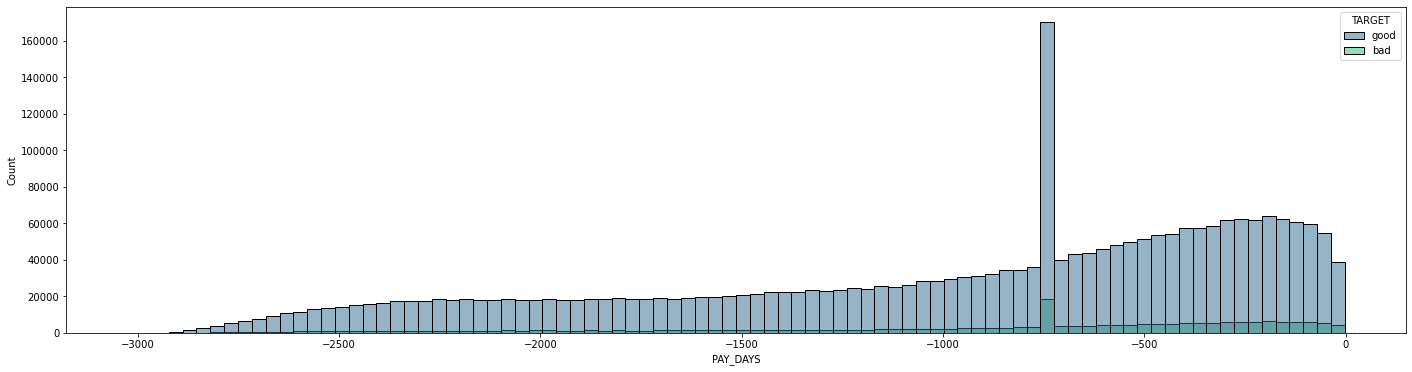

In [90]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='PAY_DAYS', bins=88, hue='TARGET', palette='viridis');

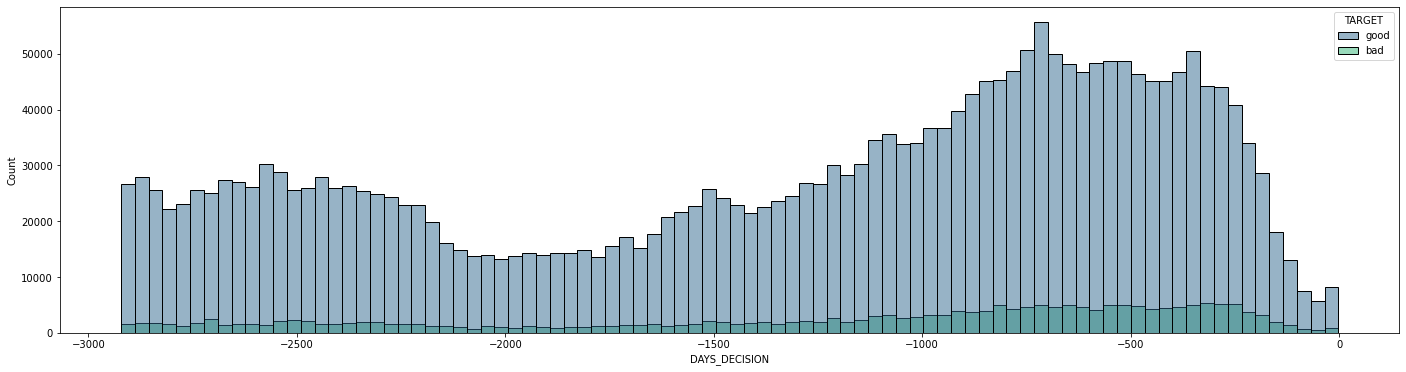

In [91]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='DAYS_DECISION', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='PAY_DAYS', ylabel='TARGET'>

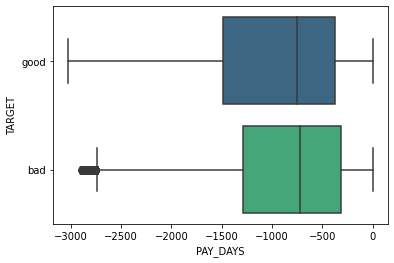

In [92]:
sns.boxplot(data=final_df, y='TARGET', x='PAY_DAYS', palette='viridis')

<AxesSubplot:xlabel='DAYS_DECISION', ylabel='TARGET'>

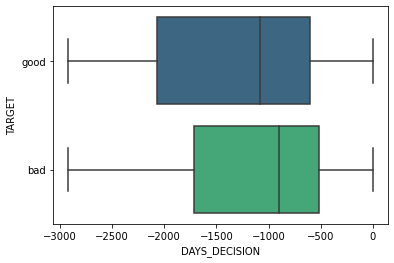

In [93]:
sns.boxplot(data=final_df, y='TARGET', x='DAYS_DECISION', palette='viridis')

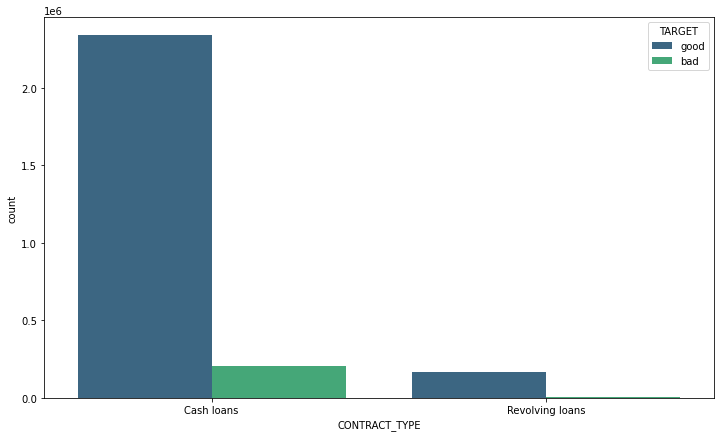

In [94]:
plt.figure(figsize=(12,7))
sns.countplot(x='CONTRACT_TYPE',data=final_df,hue='TARGET', palette='viridis');

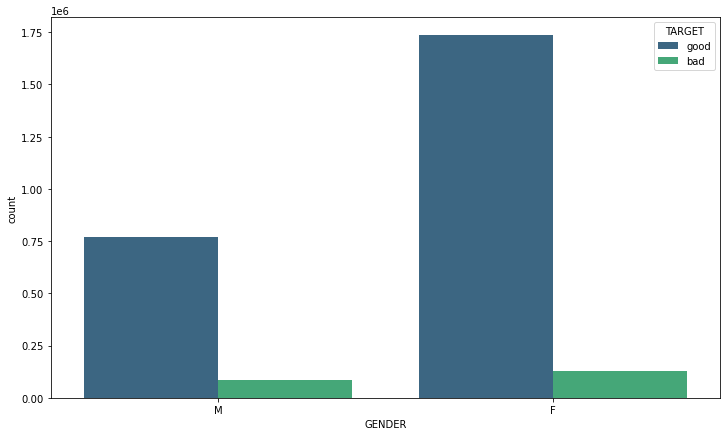

In [95]:
plt.figure(figsize=(12,7))
sns.countplot(x='GENDER',data=final_df,hue='TARGET', palette='viridis');

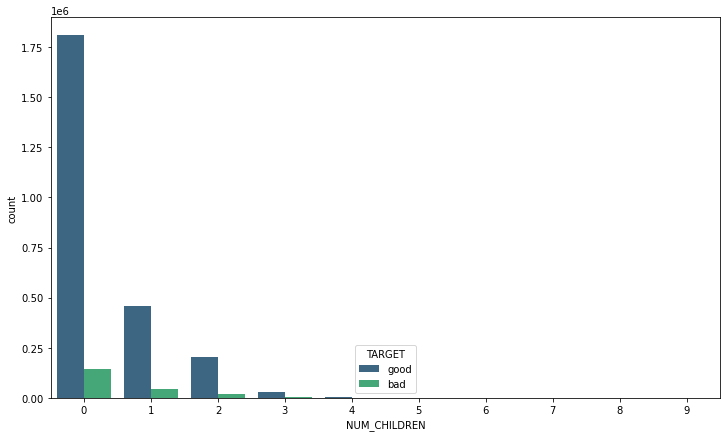

In [96]:
plt.figure(figsize=(12,7))
sns.countplot(x='NUM_CHILDREN',data=final_df,hue='TARGET', palette='viridis');

In [97]:
final_df['NUM_CHILDREN'].value_counts()

0    1954013
1     502374
2     221584
3      33032
4       3863
5       1102
7         54
6         52
8         40
9         37
Name: NUM_CHILDREN, dtype: int64

In [98]:
#num of children above 4 is to small, i modify feature 
final_df.loc[(final_df.NUM_CHILDREN == 5) | (final_df.NUM_CHILDREN == 6) | (final_df.NUM_CHILDREN == 7) | (final_df.NUM_CHILDREN == 8) | (final_df.NUM_CHILDREN == 9) , 'NUM_CHILDREN'] = 4  
final_df.NUM_CHILDREN.value_counts()

0    1954013
1     502374
2     221584
3      33032
4       5148
Name: NUM_CHILDREN, dtype: int64

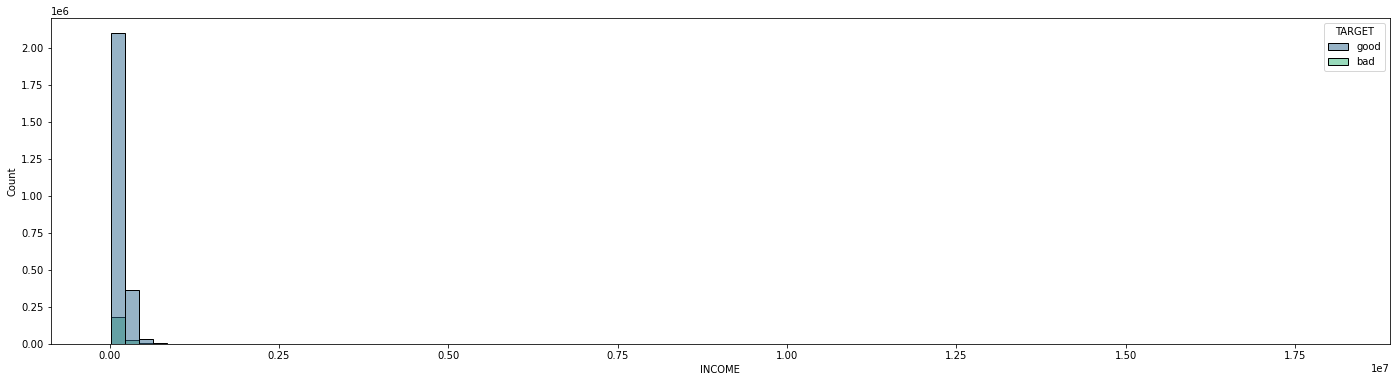

In [99]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='INCOME', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='INCOME', ylabel='TARGET'>

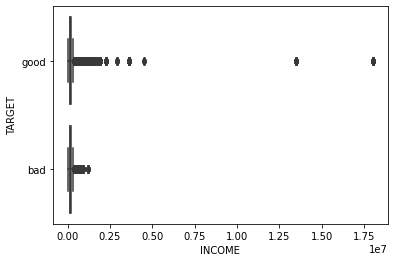

In [100]:
sns.boxplot(data=final_df, y='TARGET', x='INCOME', palette='viridis')

In [101]:
len(final_df[final_df['INCOME'] > 450000])*100/len(final_df)

0.8418898654750785

In [102]:
#Removing outlier
final_df = final_df[final_df['INCOME'] < 450000]

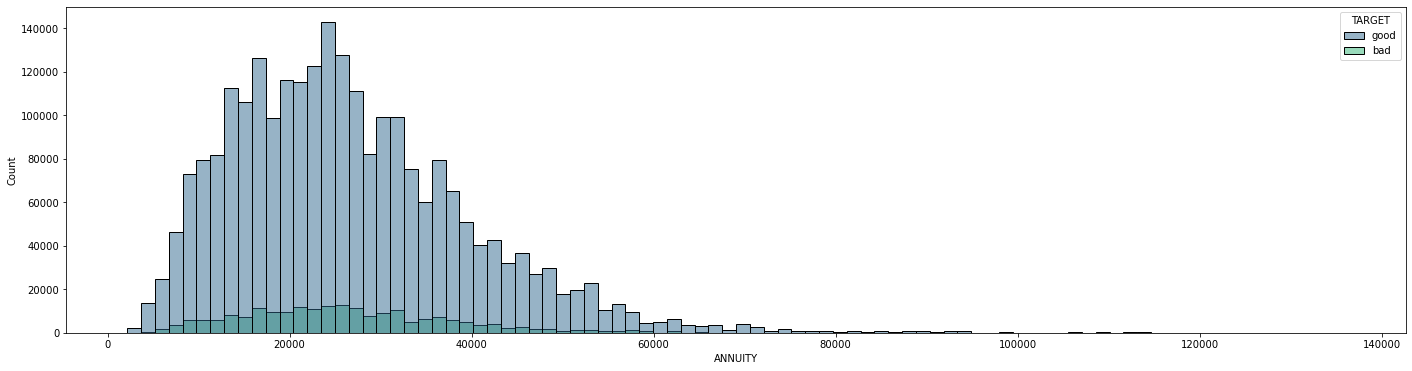

In [103]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='ANNUITY', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='INCOME', ylabel='TARGET'>

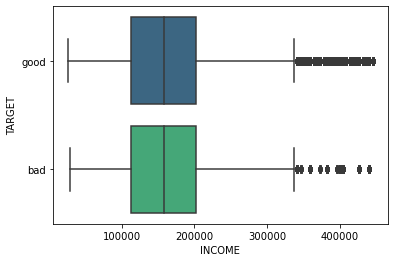

In [104]:
sns.boxplot(data=final_df, y='TARGET', x='INCOME', palette='viridis')

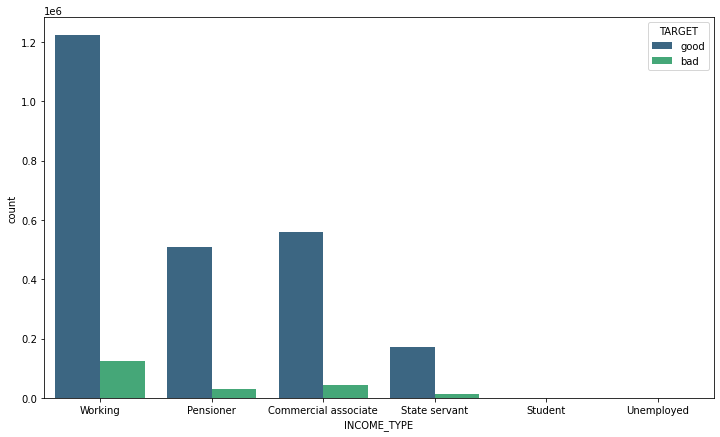

In [105]:
plt.figure(figsize=(12,7))
sns.countplot(x='INCOME_TYPE',data=final_df,hue='TARGET', palette='viridis');

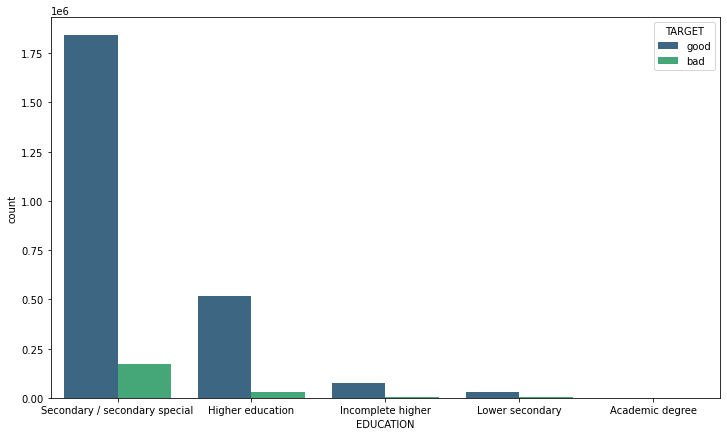

In [106]:
plt.figure(figsize=(12,7))
sns.countplot(x='EDUCATION',data=final_df,hue='TARGET', palette='viridis');

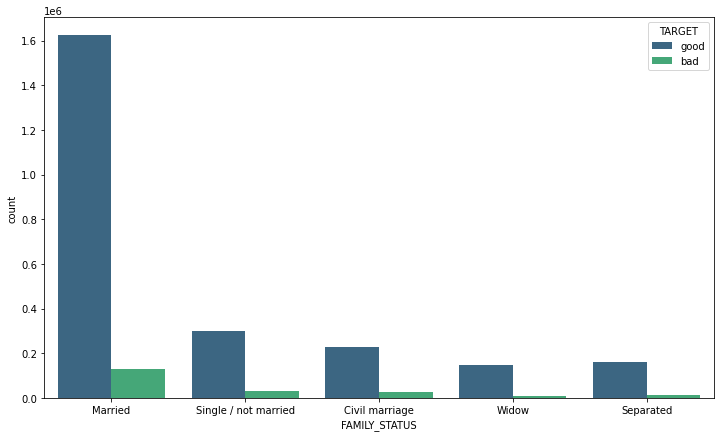

In [107]:
plt.figure(figsize=(12,7))
sns.countplot(x='FAMILY_STATUS',data=final_df,hue='TARGET', palette='viridis');

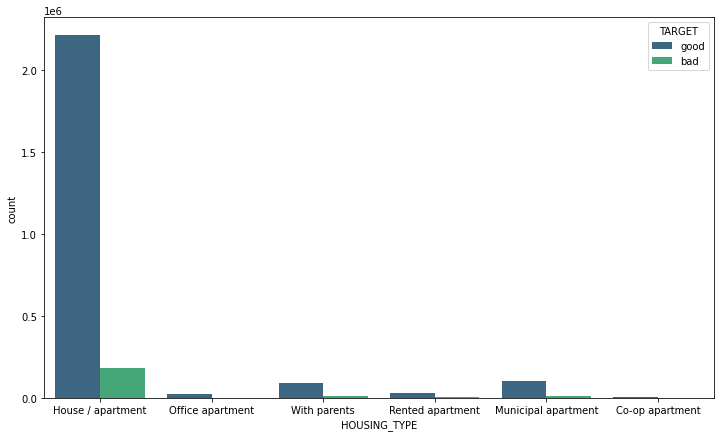

In [108]:
plt.figure(figsize=(12,7))
sns.countplot(x='HOUSING_TYPE',data=final_df,hue='TARGET', palette='viridis');

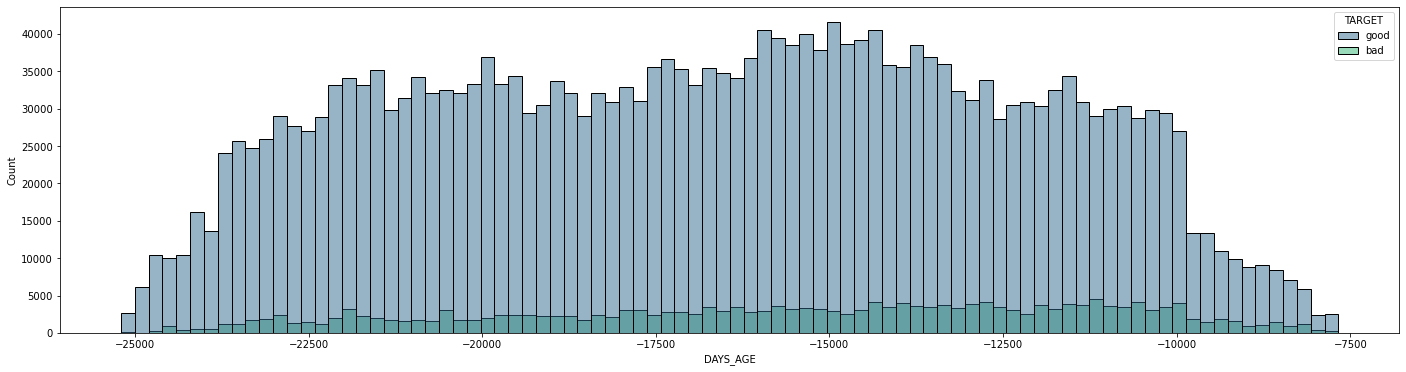

In [109]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='DAYS_AGE', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='DAYS_AGE', ylabel='TARGET'>

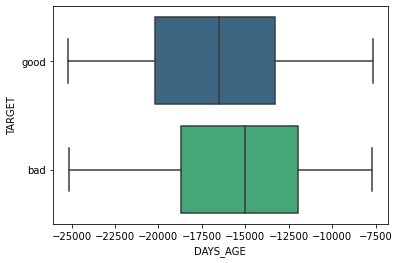

In [110]:
sns.boxplot(data=final_df, y='TARGET', x='DAYS_AGE', palette='viridis')

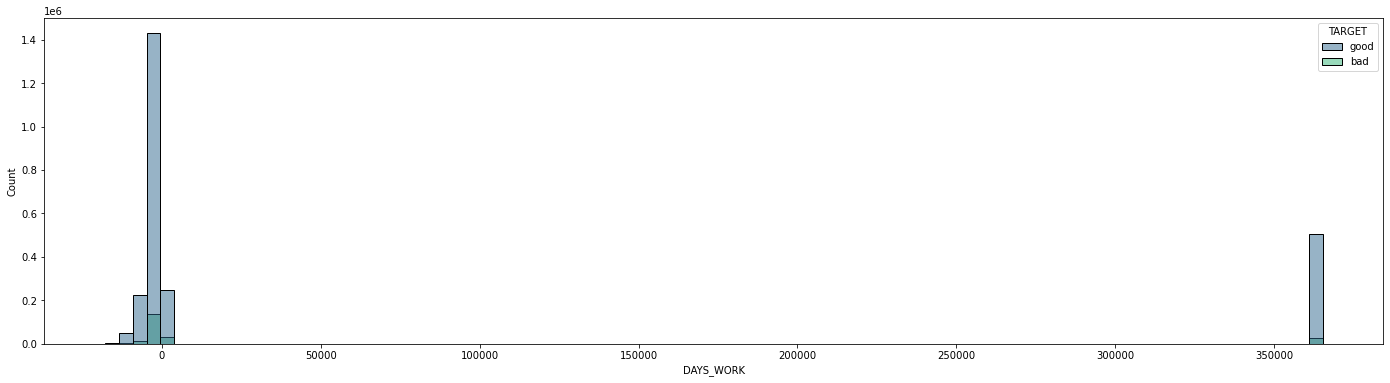

In [111]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='DAYS_WORK', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='DAYS_WORK', ylabel='TARGET'>

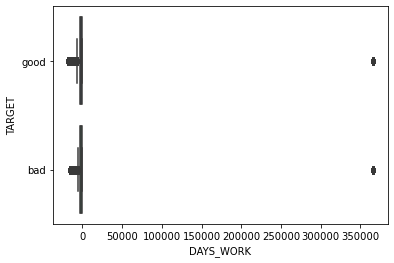

In [112]:
sns.boxplot(data=final_df, y='TARGET', x='DAYS_WORK', palette='viridis')

In [113]:
len(final_df[final_df['DAYS_WORK'] < 100000])*100/len(final_df)

79.92275868880573

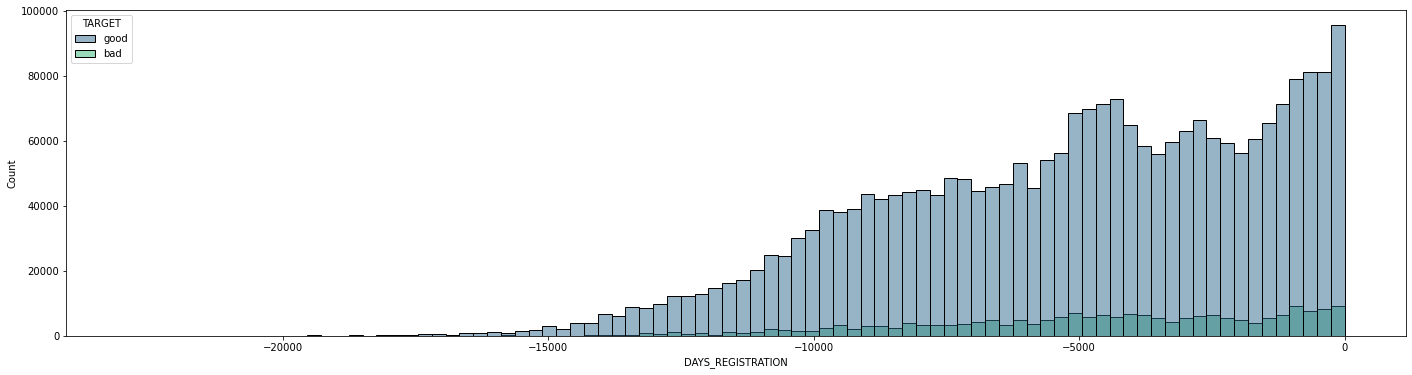

In [114]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='DAYS_REGISTRATION', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='DAYS_REGISTRATION', ylabel='TARGET'>

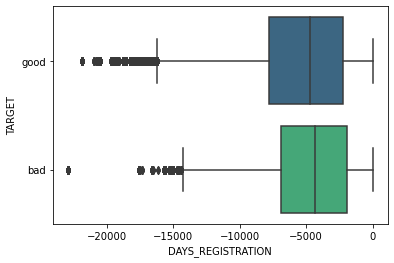

In [115]:
sns.boxplot(data=final_df, y='TARGET', x='DAYS_REGISTRATION', palette='viridis')

In [116]:
len(final_df[final_df['DAYS_REGISTRATION'] < -15000])*100/len(final_df)

0.42825791399823865

In [117]:
#remove outlier
final_df = final_df[final_df['DAYS_REGISTRATION'] > -15000]

<AxesSubplot:xlabel='DAYS_REGISTRATION', ylabel='TARGET'>

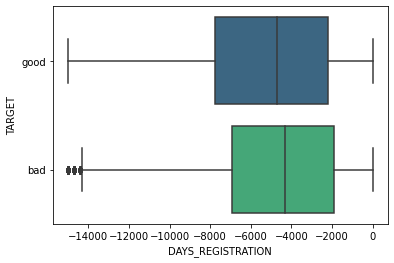

In [118]:
sns.boxplot(data=final_df, y='TARGET', x='DAYS_REGISTRATION', palette='viridis')

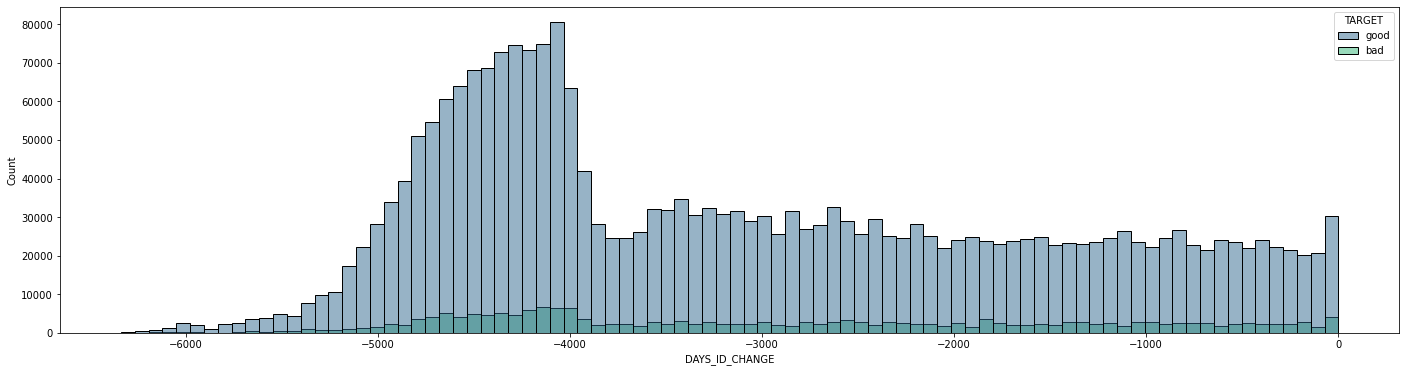

In [119]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='DAYS_ID_CHANGE', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='DAYS_ID_CHANGE', ylabel='TARGET'>

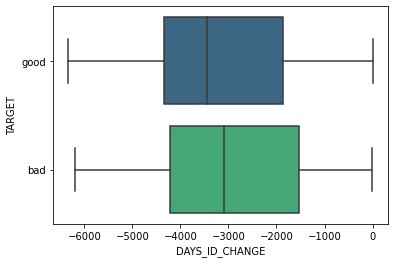

In [120]:
sns.boxplot(data=final_df, y='TARGET', x='DAYS_ID_CHANGE', palette='viridis')

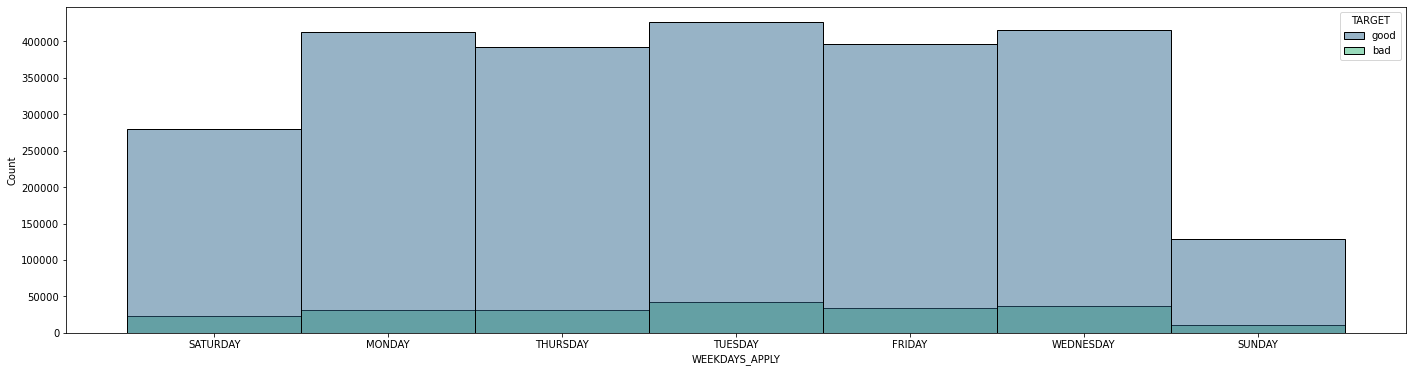

In [121]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='WEEKDAYS_APPLY', bins=88, hue='TARGET', palette='viridis');

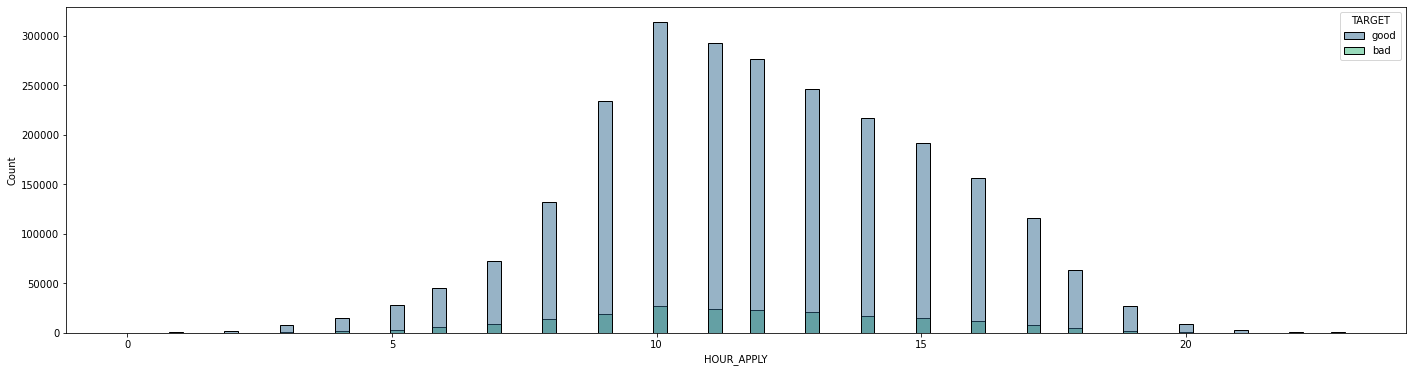

In [122]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='HOUR_APPLY', bins=88, hue='TARGET', palette='viridis');

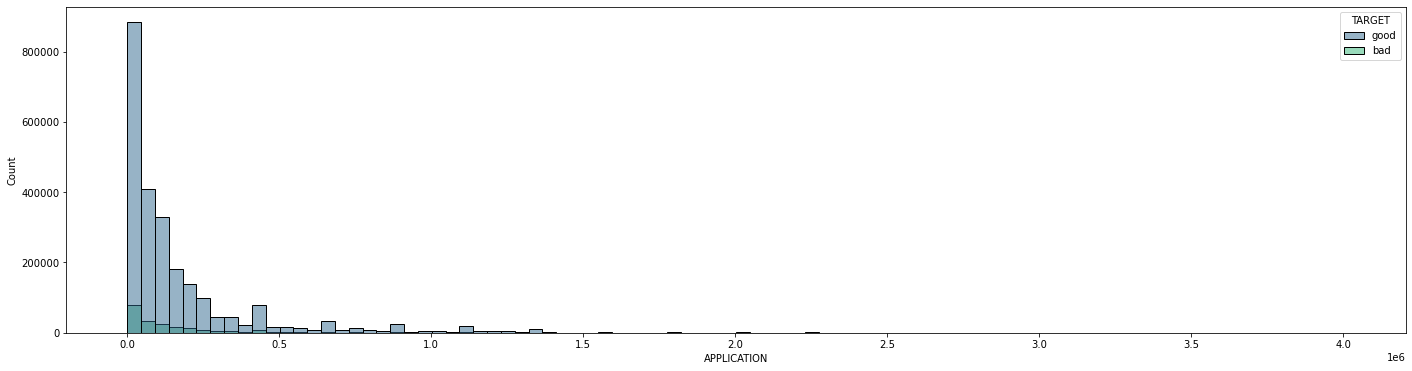

In [123]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='APPLICATION', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='APPLICATION', ylabel='TARGET'>

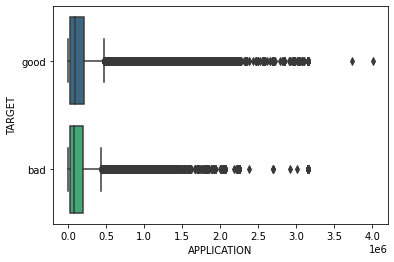

In [124]:
sns.boxplot(data=final_df, y='TARGET', x='APPLICATION', palette='viridis')

In [125]:
len(final_df[final_df['APPLICATION'] > 1250000])*100/len(final_df)

1.0528748156567318

In [126]:
#remove outlier
final_df = final_df[final_df['APPLICATION'] < 1250000]

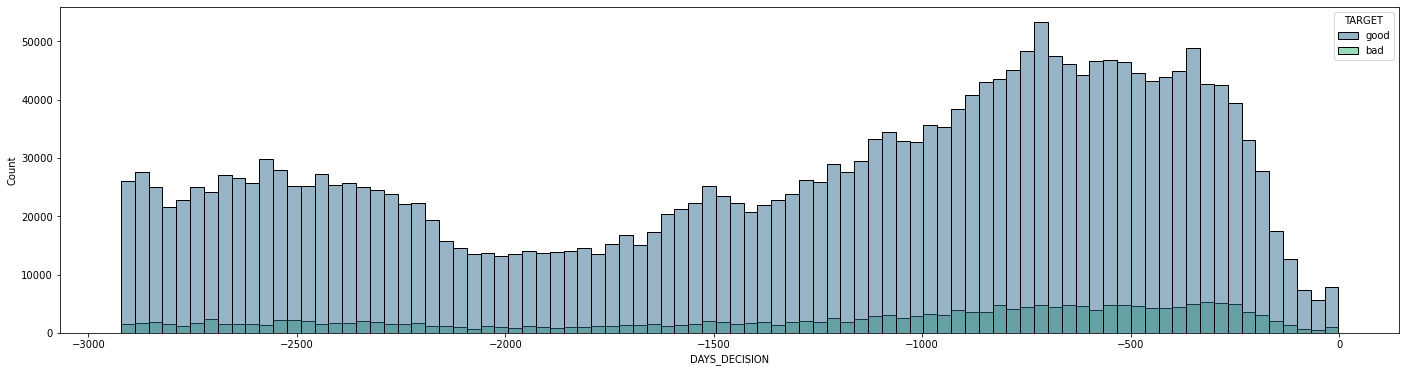

In [127]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='DAYS_DECISION', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='DAYS_DECISION', ylabel='TARGET'>

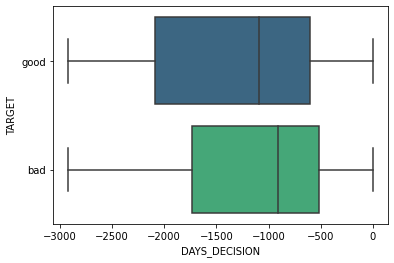

In [128]:
sns.boxplot(data=final_df, y='TARGET', x='DAYS_DECISION', palette='viridis')

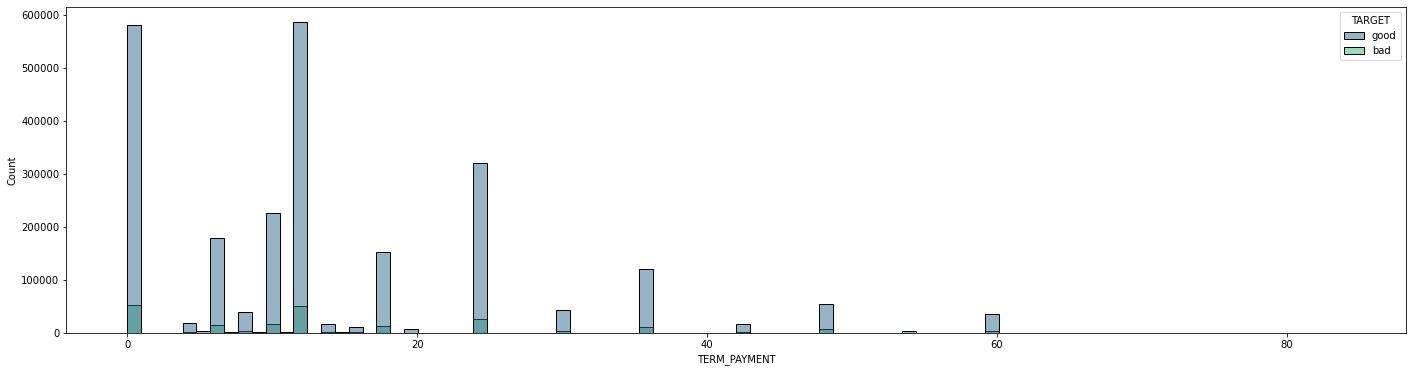

In [129]:
plt.figure(figsize=(24,6))
sns.histplot(data=final_df, x='TERM_PAYMENT', bins=88, hue='TARGET', palette='viridis');

<AxesSubplot:xlabel='TERM_PAYMENT', ylabel='TARGET'>

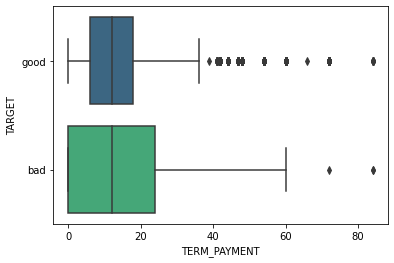

In [130]:
sns.boxplot(data=final_df, y='TARGET', x='TERM_PAYMENT', palette='viridis')

In [131]:
len(final_df[final_df['TERM_PAYMENT'] > 60])*100/len(final_df)

0.01196148175038628

In [132]:
#remove outlier
final_df = final_df[final_df['TERM_PAYMENT'] < 60]

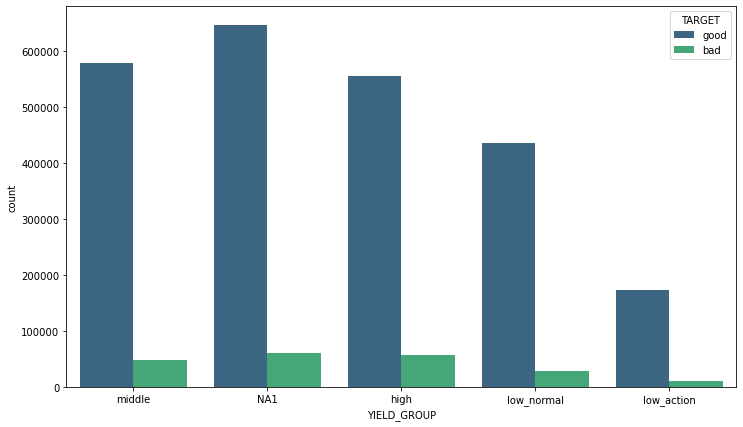

In [133]:
plt.figure(figsize=(12,7))
sns.countplot(x='YIELD_GROUP',data=final_df,hue='TARGET', palette='viridis');

In [134]:
unique_values(final_df)

,Total,Uniques
LN_ID,2594309,69879
TARGET,2594309,2
CONTRACT_TYPE,2594309,2
GENDER,2594309,2
NUM_CHILDREN,2594309,5
INCOME,2594309,685
ANNUITY,2594309,9426
PRICE,2594309,495
INCOME_TYPE,2594309,6
EDUCATION,2594309,5


In [135]:
final_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    549715
NA1                       511484
Self-employed             332452
Other                     132911
Medicine                   95350
Business Entity Type 2     86553
Government                 84540
School                     76185
Kindergarten               63955
Trade: type 7              63316
Construction               55552
Business Entity Type 1     48100
Transport: type 4          42336
Industry: type 3           29058
Housing                    28621
Security                   27651
Industry: type 9           25899
Industry: type 11          24045
Agriculture                23593
Trade: type 3              22899
Military                   20601
Postal                     20012
Police                     19100
Bank                       17506
Transport: type 2          16429
Security Ministries        15683
Restaurant                 14377
Services                   12606
Trade: type 2              12487
Industry: type 7           11678
University

there are too many unique ORGANIZATION_TYPE to try to convert this to a dummy variable feature. Let's remove that ORGANIZATION_TYPE column.

In [136]:
final_df.drop('ORGANIZATION_TYPE', axis=1, inplace=True)

In [137]:
df_new = final_df.copy()

In [138]:
def change_status(x):
  if x['TARGET'] == 'good':
    return 0
  else :
    return 1

df_new['TARGET'] = df_new.apply(change_status,axis=1)

In [139]:
df_new['TARGET'].value_counts()

0    2389461
1     204848
Name: TARGET, dtype: int64

In [140]:
df_new = df_new.drop(['LN_ID'], axis=1)

In [141]:
#df_new.to_csv('df_fix.csv')

In [2]:
#df_new = pd.read_csv('df_fix.csv')

In [3]:
df_new = df_new.drop(['SK_ID_PREV','FIRST_DRAW'],axis=1)

<center><h1 font-size='40px'>Machine Learning</h1></center>

In [ ]:
df_new.columns

In [145]:
catcol = df_new.select_dtypes('object').columns
catcol

Index(['CONTRACT_TYPE', 'GENDER', 'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS',
       'HOUSING_TYPE', 'WEEKDAYS_APPLY', 'key', 'CONTRACT_STATUS',
       'YIELD_GROUP'],
      dtype='object')

In [4]:
dummi = pd.get_dummies(df_new, columns=['CONTRACT_TYPE', 'GENDER', 'NUM_CHILDREN', 'INCOME_TYPE', 'EDUCATION',
       'FAMILY_STATUS', 'HOUSING_TYPE', 'WEEKDAYS_APPLY',
       'CONTRACT_STATUS', 'YIELD_GROUP'], drop_first=True)

In [147]:
df_new.columns

Index(['TARGET', 'CONTRACT_TYPE', 'GENDER', 'NUM_CHILDREN', 'INCOME',
       'ANNUITY', 'PRICE', 'INCOME_TYPE', 'EDUCATION', 'FAMILY_STATUS',
       'HOUSING_TYPE', 'DAYS_AGE', 'DAYS_WORK', 'DAYS_REGISTRATION',
       'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY', 'HOUR_APPLY', 'key', 'SK_ID_PREV',
       'APPLICATION', 'CONTRACT_STATUS', 'DAYS_DECISION', 'TERM_PAYMENT',
       'YIELD_GROUP', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL', 'INST_NUMBER', 'PAY_DAYS', 'AMT_PAY'],
      dtype='object')

In [5]:
df_new = pd.concat([df_new, dummi], axis=1)
df_new.head()

,Unnamed: 0,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,ANNUITY,PRICE,INCOME_TYPE,EDUCATION,...,WEEKDAYS_APPLY_THURSDAY,WEEKDAYS_APPLY_TUESDAY,WEEKDAYS_APPLY_WEDNESDAY,CONTRACT_STATUS_Canceled,CONTRACT_STATUS_Refused,CONTRACT_STATUS_Unused offer,YIELD_GROUP_high,YIELD_GROUP_low_action,YIELD_GROUP_low_normal,YIELD_GROUP_middle
0,0,0,Cash loans,M,3,135000.0,44604.0,765000.0,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,1
1,1,0,Cash loans,M,3,135000.0,44604.0,765000.0,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,1
2,2,0,Cash loans,M,3,135000.0,44604.0,765000.0,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,1
3,3,0,Cash loans,M,3,135000.0,44604.0,765000.0,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,1
4,4,0,Cash loans,M,3,135000.0,44604.0,765000.0,Working,Secondary / secondary special,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df_new = df_new.drop(['CONTRACT_TYPE', 'GENDER', 'NUM_CHILDREN', 'INCOME_TYPE', 'EDUCATION',
       'FAMILY_STATUS', 'HOUSING_TYPE', 'WEEKDAYS_APPLY',
       'CONTRACT_STATUS', 'YIELD_GROUP'], axis=1)
df_new.head()

,Unnamed: 0,TARGET,INCOME,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,...,WEEKDAYS_APPLY_THURSDAY,WEEKDAYS_APPLY_TUESDAY,WEEKDAYS_APPLY_WEDNESDAY,CONTRACT_STATUS_Canceled,CONTRACT_STATUS_Refused,CONTRACT_STATUS_Unused offer,YIELD_GROUP_high,YIELD_GROUP_low_action,YIELD_GROUP_low_normal,YIELD_GROUP_middle
0,0,0,135000.0,44604.0,765000.0,-17598,-2650,-1411.0,-1131,7,...,0,0,0,0,0,0,0,0,0,1
1,1,0,135000.0,44604.0,765000.0,-17598,-2650,-1411.0,-1131,7,...,0,0,0,0,0,0,0,0,0,1
2,2,0,135000.0,44604.0,765000.0,-17598,-2650,-1411.0,-1131,7,...,0,0,0,0,0,0,0,0,0,1
3,3,0,135000.0,44604.0,765000.0,-17598,-2650,-1411.0,-1131,7,...,0,0,0,0,0,0,0,0,0,1
4,4,0,135000.0,44604.0,765000.0,-17598,-2650,-1411.0,-1131,7,...,0,0,0,0,0,0,0,0,0,1


In [7]:
_, i = np.unique(df_new.columns, return_index=True)
df_new = df_new.iloc[:, i]

In [39]:
unique_values(df_new)

,Total,Uniques
AMT_PAY,2594309,385449
ANNUITY,2594309,9426
APPLICATION,2594309,41716
CONTRACT_STATUS_Canceled,2594309,2
CONTRACT_STATUS_Refused,2594309,2
CONTRACT_STATUS_Unused offer,2594309,2
CONTRACT_TYPE_Revolving loans,2594309,2
DAYS_AGE,2594309,16500
DAYS_DECISION,2594309,2921
DAYS_ID_CHANGE,2594309,5841


In [27]:
missing_data(df_new)

,Total,Percent
YIELD_GROUP_middle,0,0.0
AMT_PAY,0,0.0
NUM_CHILDREN_4,0,0.0
NUM_CHILDREN_3,0,0.0
NUM_CHILDREN_2,0,0.0
...,...,...
NFLAG_INSURED_ON_APPROVAL,0,0.0
INST_NUMBER,0,0.0
PAY_DAYS,0,0.0
AMT_PAY,0,0.0


In [28]:
df_new.columns

Index(['Unnamed: 0', 'TARGET', 'INCOME', 'ANNUITY', 'PRICE', 'DAYS_AGE',
       'DAYS_WORK', 'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'HOUR_APPLY',
       ...
       'WEEKDAYS_APPLY_THURSDAY', 'WEEKDAYS_APPLY_TUESDAY',
       'WEEKDAYS_APPLY_WEDNESDAY', 'CONTRACT_STATUS_Canceled',
       'CONTRACT_STATUS_Refused', 'CONTRACT_STATUS_Unused offer',
       'YIELD_GROUP_high', 'YIELD_GROUP_low_action', 'YIELD_GROUP_low_normal',
       'YIELD_GROUP_middle'],
      dtype='object', length=140)

In [8]:
#df_new.to_csv('dumdum.csv')

In [23]:
df_new = pd.read_csv('dumdum.csv')

In [3]:
df_new.head()

,Unnamed: 0,TARGET,INCOME,ANNUITY,PRICE,DAYS_AGE,DAYS_WORK,DAYS_REGISTRATION,DAYS_ID_CHANGE,HOUR_APPLY,...,WEEKDAYS_APPLY_THURSDAY,WEEKDAYS_APPLY_TUESDAY,WEEKDAYS_APPLY_WEDNESDAY,CONTRACT_STATUS_Canceled,CONTRACT_STATUS_Refused,CONTRACT_STATUS_Unused offer,YIELD_GROUP_high,YIELD_GROUP_low_action,YIELD_GROUP_low_normal,YIELD_GROUP_middle
0,0,0,135000.0,44604.0,765000.0,-17598,-2650,-1411.0,-1131,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,135000.0,44604.0,765000.0,-17598,-2650,-1411.0,-1131,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,135000.0,44604.0,765000.0,-17598,-2650,-1411.0,-1131,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,135000.0,44604.0,765000.0,-17598,-2650,-1411.0,-1131,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,135000.0,44604.0,765000.0,-17598,-2650,-1411.0,-1131,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
X = df_new.drop(['Unnamed: 0','TARGET'],axis=1)
y = df_new['TARGET']

In [38]:
#i drop key features because my laptop lack of memory, and re arangge train and test data
X = X.drop(['key'], axis=1)

In [39]:
#X_train = X[X['key'] =='train']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.fit_transform(X_test)

In [44]:
X_test

array([[ 0.06324416, -0.12086598, -0.38526387, ..., -0.27670118,
        -0.46677122,  1.76907326],
       [-0.59173895,  0.27662495, -0.59361395, ..., -0.27670118,
         2.14237715, -0.56526772],
       [-0.76066087, -1.0755325 , -0.50885774, ..., -0.27670118,
        -0.46677122, -0.56526772],
       ...,
       [ 2.38271964,  1.0722951 ,  3.56802338, ..., -0.27670118,
         2.14237715, -0.56526772],
       [ 2.2641532 ,  0.52578809, -0.07971236, ..., -0.27670118,
        -0.46677122,  1.76907326],
       [ 0.10949225,  1.52037578, -0.72343043, ..., -0.27670118,
        -0.46677122, -0.56526772]])

In [52]:
# F1 Score from Normal Train Data (without SMOTE)
# Using F1 Score because the data imbalance, so can't trust to accuracy

algorithm = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, LGBMClassifier, KNeighborsClassifier]
algo_name = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','LGBMClassifier','KNeighborsClassifier']
algo_F1Score = []

for item in algorithm:
  model = item()
  F1Scores = cross_val_score(model,X_train,y_train,cv=5,scoring='f1').mean()
  algo_F1Score.append(F1Scores)

df_algo = pd.DataFrame({
    'Algorithm' : algo_name,
    'F1 Score' : algo_F1Score,
})

df_algo

,Algorithm,F1 Score
0,LogisticRegression,0.001031
1,DecisionTreeClassifier,0.980707
2,RandomForestClassifier,NaN
3,LGBMClassifier,0.052988
4,KNeighborsClassifier,NaN


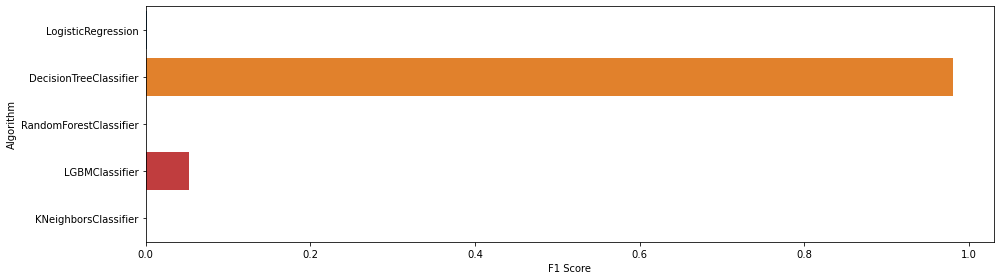

In [53]:
# Plot F1 Score from Normal Data Train

plt.figure(figsize=(14,4))
sns.barplot(data=df_algo,y='Algorithm',x='F1 Score')
plt.tight_layout()

In [45]:
# Modelling and fitting
dt = DecisionTreeClassifier(random_state=101)
dt.fit(X_train,y_train)

# predicting
prediction_dt = dt.predict(X_test)

# Evaluation
print('=============== CLASSIFICATION REPORT ===============')
print(classification_report(y_test,prediction_dt))
print()
tn, fp, fn, tp = confusion_matrix(y_test,prediction_dt).ravel()
print('tn : ',tn, ' fp : ',fp,' fn : ' ,fn,' tp : ' ,tp)

=============== CLASSIFICATION REPORT ===============
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    716942
           1       0.85      0.85      0.85     61351

    accuracy                           0.98    778293
   macro avg       0.92      0.92      0.92    778293
weighted avg       0.98      0.98      0.98    778293


tn :  707840  fp :  9102  fn :  9175  tp :  52176


the model can save the lender problem, because can predict true negative so high.
this means the model can predict bad loans better

In [46]:
# feature importances
score = pd.DataFrame(dt.feature_importances_, columns=['Score'])
score['Column'] = X.columns
score.head()

,Score,Column
0,0.008073,AMT_PAY
1,0.102254,ANNUITY
2,0.019082,APPLICATION
3,0.000116,CONTRACT_STATUS_Canceled
4,0.000550,CONTRACT_STATUS_Refused


<AxesSubplot:xlabel='Score', ylabel='Column'>

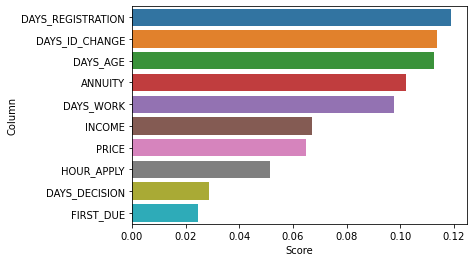

In [47]:
# Make plot feature importances
new_score = score.sort_values(by='Score',ascending=False)
sns.barplot(data=new_score[:10],x='Score',y='Column')

## Dump Model

In [51]:

import pickle
pickle.dump(dt, open('model.pkl','wb'))

In [ ]:
#X = df_new.drop(['Unnamed: 0', 'TARGET', 'key'],axis=1)
#y = df_new['TARGET']

# Train Test Split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# SMOTE (get X_train_smote, y_train_smote)
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=101)
#X_train_smote, y_train_smote = sm.fit_sample(X_train,y_train)
#X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)

# So we have new x_train, x_train_smote, and x_test
## we need to duplicate x_test, because one x_test will get standardize from normal x_train and the other one from SMOTE X_train
#X_test_normal = X_test.copy()
#X_test_smote = X_test.copy()


In [ ]:
# F1 Score from SMOTE Data Train
#from lightgbm import LGBMClassifier
#algorithm = [LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, LGBMClassifier, KNeighborsClassifier]
#algo_name = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','LGBMClassifier','KNeighborsClassifier']
#algo_F1Smote = []

#for item in algorithm:
 #   model = item()
 #   F1ScoresSmote = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring='f1').mean()
 #   algo_F1Smote.append(F1ScoresSmote)

#df_algo_smote = pd.DataFrame({
 #   'Algorithm' : algo_name,
  #  'F1 Score SMOTE' : algo_F1Smote,
#})

#df_algo_smote